In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the data
df=pd.read_csv(r"C:\Users\Methuna\Downloads\train.csv")

In [6]:
# displaying the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [10]:
# preparing the features and target variable
X=df[['GrLivArea','BedroomAbvGr','FullBath']]
y=df['SalePrice']
print(X.head())

   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2


In [11]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [12]:
# creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# makingpredictions on the test set
y_pred = model.predict(X_test)

In [14]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2806426667.247853


In [15]:
print(f"R-squared Score: {r2}")

R-squared Score: 0.6341189942328371


In [16]:
# printing the coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")


Model Coefficients:
GrLivArea: 104.0263070122644
BedroomAbvGr: -26655.165357341266
FullBath: 30014.324108956615
Intercept: 52261.748626944594


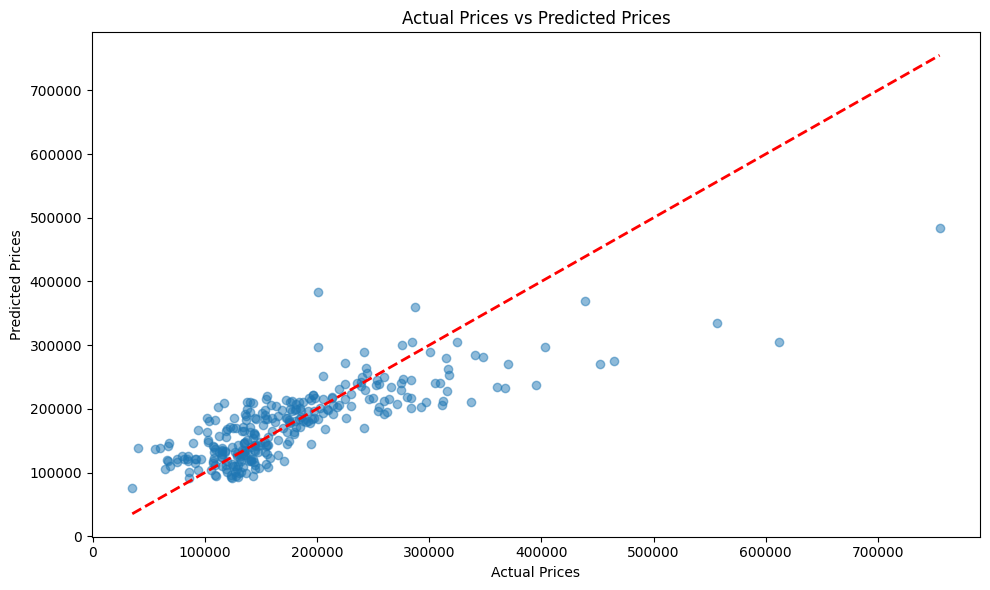

In [17]:
# visualization of the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.tight_layout()
plt.show()

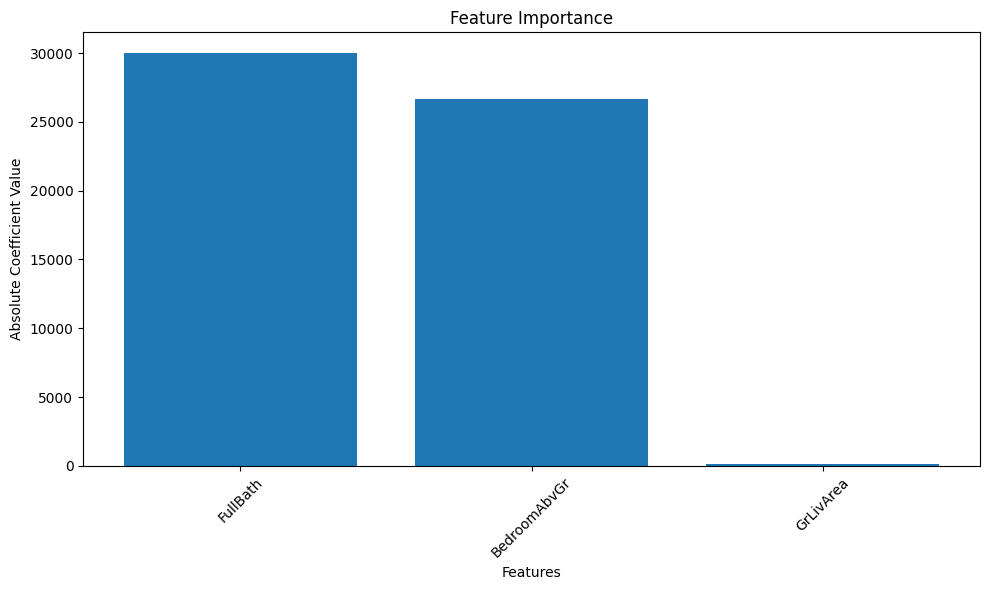

In [18]:
# Visualize feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)
GrLivArea is present in the training set
GrLivArea is present in the test set

BedroomAbvGr is present in the training set
BedroomAbvGr is present in the test set

FullBath is present in the training set
FullBath is present in the test set

SalePrice is present in the training set
SalePrice is NOT present in the test set


Model Coefficients:
GrLivArea: 110.06172638795802
BedroomAbvGr: -27859.332223528167
FullBath: 29694.688390615695
Intercept: 47509.4821894654

Cross-validation RMSE scores: [45764.13061619 51165.96375852 53790.96176106 45646.19437475
 60896.24579247]
Average RMSE: 51452.69926059719


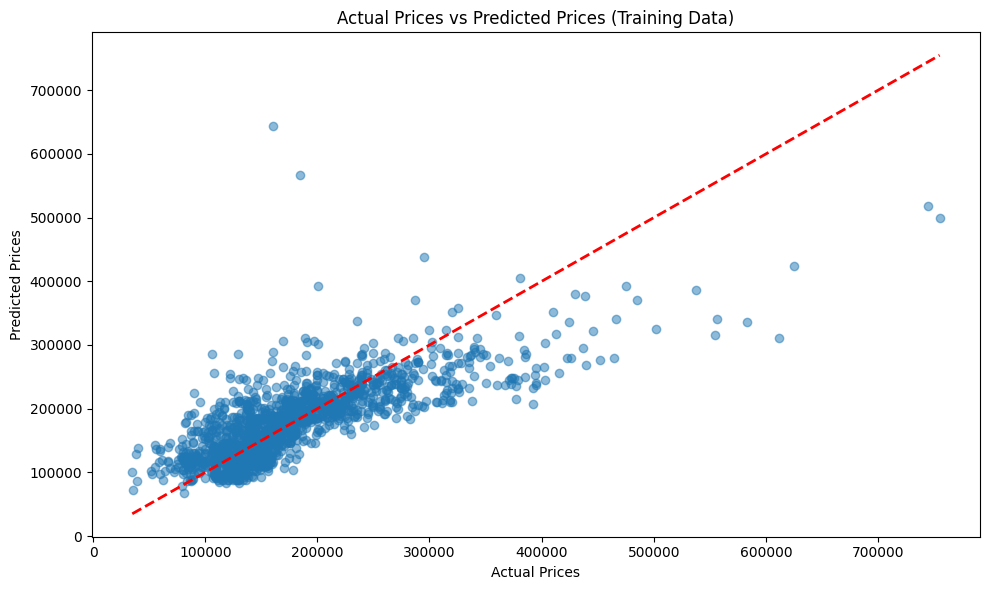

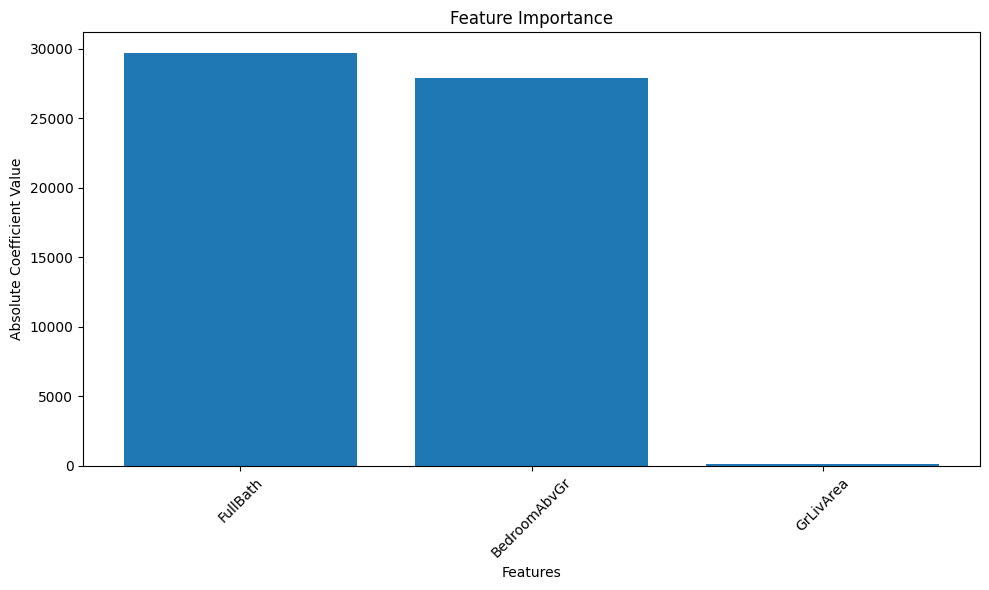

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data
train_df = pd.read_csv(r"C:\Users\Methuna\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\Methuna\Downloads\test.csv")

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Step 2: Identify features and target
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Verify if these columns exist in both datasets
for col in features + [target]:
    if col in train_df.columns:
        print(f"{col} is present in the training set")
    else:
        print(f"{col} is NOT present in the training set")
    
    if col in test_df.columns:
        print(f"{col} is present in the test set")
    else:
        print(f"{col} is NOT present in the test set")
    print()

# Step 3: Prepare features and target for training set
X_train = train_df[features]
y_train = train_df[target]

# Prepare features for test set
X_test = test_df[features]

# Step 4: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Print the coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

# Step 7: Evaluate the model using cross-validation on the training set
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print(f"\nCross-validation RMSE scores: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean()}")

# Step 8: Visualize the predictions vs actual values (using training data)
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Training Data)")
plt.tight_layout()
plt.show()

# Step 9: Feature importance visualization
feature_importance = pd.DataFrame({'feature': features, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 10: Prepare submission file
# submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_pred})
# submission.to_csv('submission.csv', index=False)
# print("\nSubmission file created.")